# Optimal Speedup Analysis

PowerPoint, 1_Introduction, Slide 19:

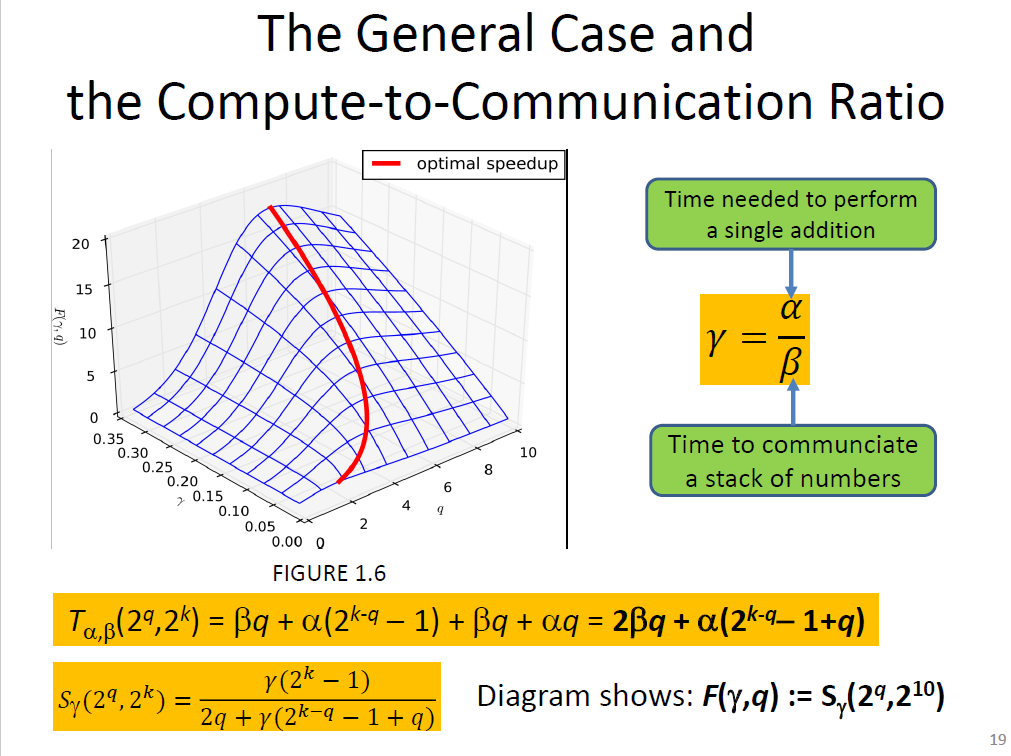



PowerPoint 1_Introduction, slide 23

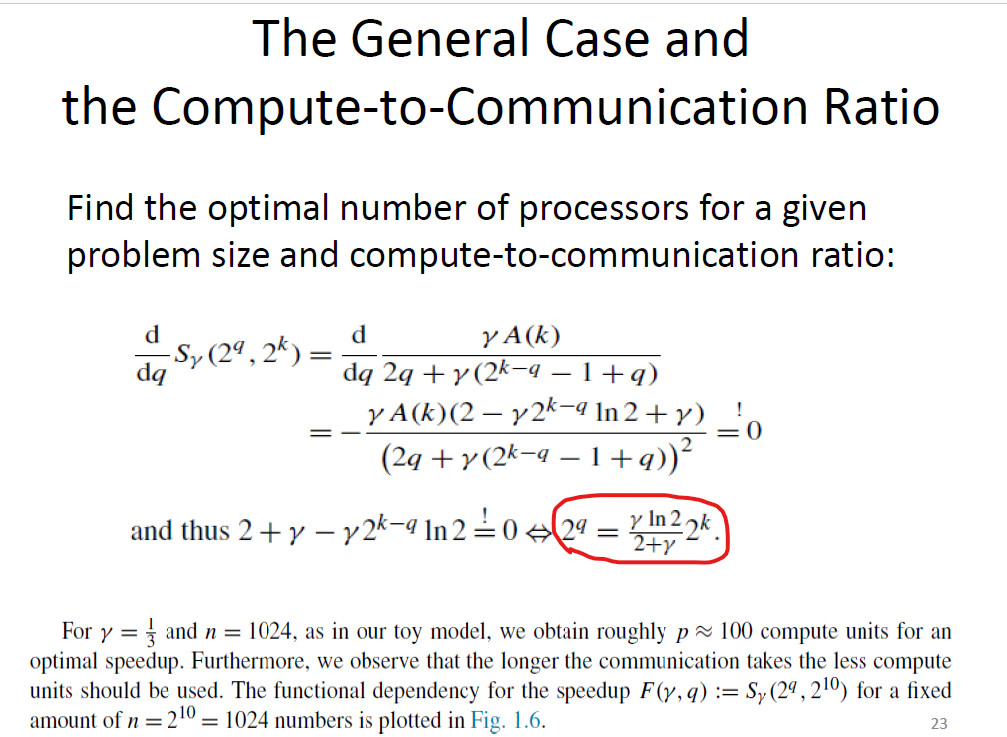

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Timing function for multi-processor computing
def t(p, n, α, β): 
  # t Returns computing time
  # Input Parameters:
  # 	p number of processors (PEs)
  # 	n problem size, i.e. number of elements to sum
  # 	α unit compute time (alpha)
  # 	β unit communication time (beta)
    q = np.log2(p)
    k = np.log2(n)
    if (p < n) :
        return 2*β*q + α*(n/p - 1 + q) # 1_Introduction slide 19
    else :
        return 2*β*(k-1) + α*k  # set q = k-1

In [3]:
# Function to find number of PEs for optimal speedup
def dq(γ, n):  
    # Return p (number of PEs) for optimal speedup for given g and n
    # Input Parameters:
    # -- γ gamma
    # -- n problem size, i.e. number of elements to sum
    return (γ*np.log(2)/(2+γ))*n


In [4]:
# Optimal speedup for g = 1/3 and n = 1024
p = round(dq(1/3, 1024),1)
(p, t(1, 1024, 1,3)/t(p, 1024, 1,3))

(101.4, 18.351087114201647)

## Plot optimal number of PEs vs γ (gamma)

In [5]:
r = np.linspace(1, 0, 1000, endpoint=False)

p = []
for x in r:
    p.append(dq(x,1024))
    

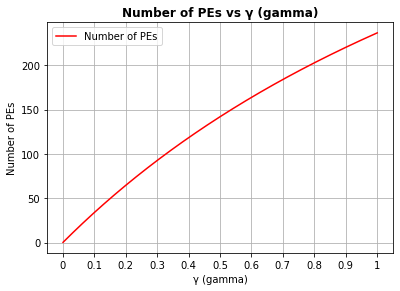

In [6]:
fig = plt.figure()
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8]) # Give margins for title, labels, tick marks and labels when saving to a file

ax.plot(r, p, '-r')
ax.set_ylabel("Number of PEs")
ax.set_xlabel("γ (gamma)")
ax.set_title("Number of PEs vs γ (gamma)",fontweight="bold")
ax.legend(labels = ("Number of PEs",), loc = "upper left")
ax.grid()
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_xticklabels(['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1'])

plt.show()

## 3D Plot of Funtion, F(γ, q), as given in slide 19

In [7]:
# Speedup as a function of γ (gamma) and q for n = 1024 (see slide 19)
def F(γ, q):
    # Input Parameters:
    # -- γ gamma,
    # -- q log2 of p (num of PEs)
    return (γ*(1024-1))/(2*q + γ*(1024/(2**q) - 1 + q))

In [8]:
#r_3d = np.linspace(0.35, 0.0, 11, endpoint=False)
r_3d = np.linspace(0.35, 0.01, 11)
#q_3d = np.linspace(10, 0, 11, endpoint=False)
q_3d = np.linspace(10, 0.01, 11)

X, Y = np.meshgrid(r_3d, q_3d)
Z = F(X, Y)

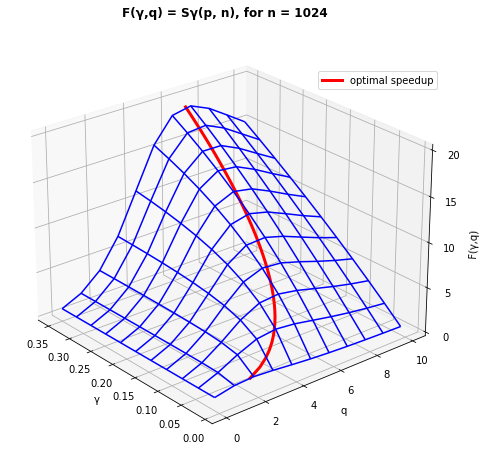

In [12]:
# 
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# 3D plot of the function, F
ax.plot_wireframe(-X, Y, Z, color='blue')
ax.set_xlabel('γ')
ax.set_ylabel('q')
ax.set_zlabel('F(γ,q)')

ax.set_xticks([0.00,-0.05,-0.10,-0.15,-0.20,-0.25,-0.30,-0.35])
ax.set_xticklabels(['0.00','0.05','0.10','0.15','0.20','0.25','0.30','0.35'])

ax.set_yticks([0,2,4,6, 8,10])
ax.set_yticklabels(['0','2','4','6','8','10'])

ax.set_zticks([0,5,10,15,20])
ax.set_zticklabels(['0','5','10','15','20'])
ax.axes.set_zlim3d(bottom=0.0, top=20.2) 

#tmp_planes = ax.zaxis._PLANES 
#ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
#                             tmp_planes[0], tmp_planes[1],
#                             tmp_planes[4], tmp_planes[5])

# Plot the optimal speedup line
y_3d = np.linspace(0.35, 0.01, 60) # num 60 shows a nice curve 

q_3d = []
for x in y_3d:
    q_3d.append(np.log2(dq(x,1024)))

z_3d = []
for z in range(len(y_3d)):
    z_3d.append(F(y_3d[z],q_3d[z]))
    
ax.plot3D(-y_3d, q_3d, z_3d, 'red', label='optimal speedup',linewidth = 3)
ax.legend(bbox_to_anchor=(1, 0.9))

# Draw Title
ax.set_title('F(γ,q) = Sγ(p, n), for n = 1024',fontweight="bold")
ax.view_init(25, -40)

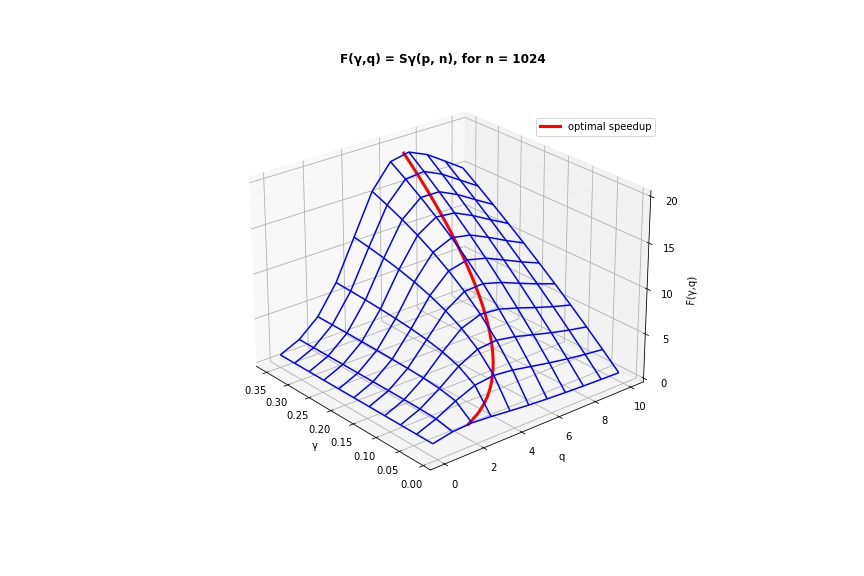

In [13]:
# Save the plot in a local image file
fig.savefig('F_3DPlot.jpg')

# To confirm that it contains what we think it contains, let's use the IPython Image object to display the contents
# this file:
from IPython.display import Image
Image('F_3DPlot.jpg')